In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


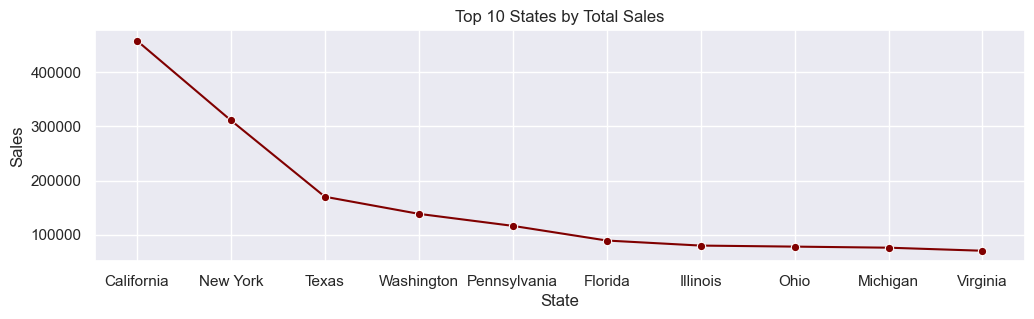

In [6]:
sns.set(rc={'figure.figsize':(12,3)})
g = data.groupby('State', as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False).head(10)
sns.lineplot(data=g, x='State', y='Sales', marker='o', color='maroon')
plt.title('Top 10 States by Total Sales')
plt.show()

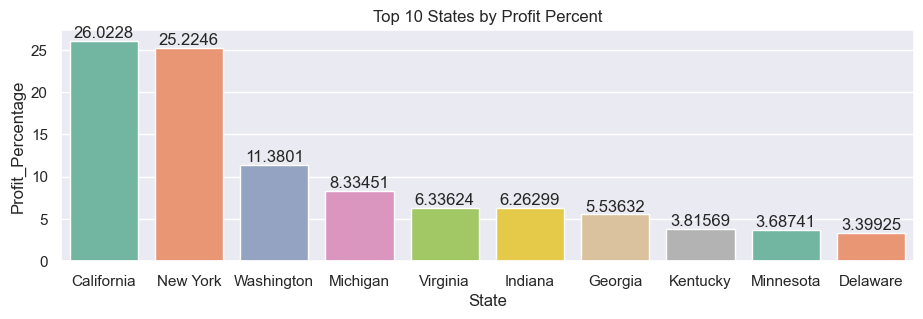

In [7]:
sns.set(rc={'figure.figsize':(11,3)})
g = data.groupby('State', as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(10)
g['Profit_Percentage'] = (g['Profit'] / g['Profit'].sum()) * 100
ax=sns.barplot(data=g, x='State', y='Profit_Percentage', hue='State', dodge=False, palette='Set2');
for container in ax.containers:
    ax.bar_label(container)
plt.title('Top 10 States by Profit Percent')
plt.show()

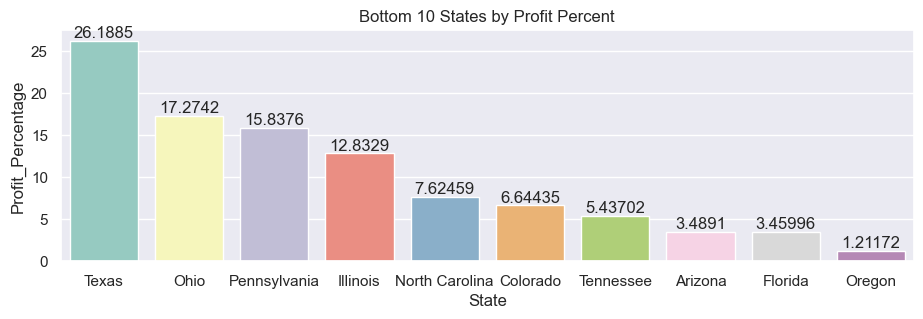

In [8]:
sns.set(rc={'figure.figsize':(11,3)})
g = data.groupby('State', as_index=False)['Profit'].sum().sort_values(by='Profit').head(10)
g['Profit_Percentage'] = (g['Profit'] / g['Profit'].sum()) * 100
ax=sns.barplot(data=g, x='State', y='Profit_Percentage', hue='State', dodge=False, palette='Set3');
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bottom 10 States by Profit Percent')
plt.show()

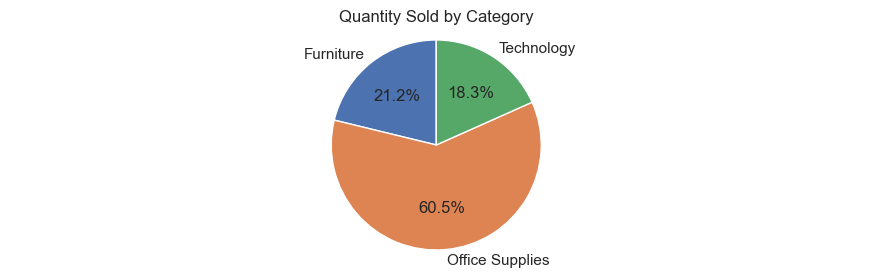

In [9]:
category_quantity = data.groupby('Category')['Quantity'].sum()
plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Quantity Sold by Category')
plt.show()

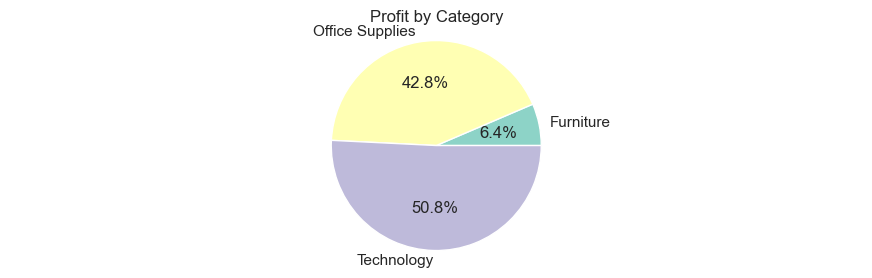

In [21]:
category_quantity = data.groupby('Category')['Profit'].sum()
plt.pie(category_quantity, labels=category_quantity.index, autopct='%1.1f%%')
sns.set_palette('Set3')
plt.axis('equal')
plt.title('Profit by Category')
plt.show()